In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [6]:
path = Path(os.getcwd())
path = path.parent / 'data' / 'processed' / 'reviews.csv' 

df = pd.read_csv(str(path))

df.head()

,Title,Airline,Type of Traveller,Class,Route,Month Flown,Overall Rating,Title.1,Reviews,Cleaned Reviews
0,Flight was amazing,Singapore Airlines,Solo Leisure,Business Class,Jakarta to Singapore,December 2023,9,Flight was amazing,Flight was amazing. The crew onboard this fl...,flight amazing crew onboard flight welcomin...
1,seats on this aircraft are dreadful,Singapore Airlines,Solo Leisure,Economy Class,Phuket to Singapore,February 2024,3,seats on this aircraft are dreadful,Booking an emergency exit seat still meant h...,book emergency exit seat mean huge discomfo...
2,Food was plentiful and tasty,Singapore Airlines,Family Leisure,Economy Class,Siem Reap to Singapore,February 2024,10,Food was plentiful and tasty,Excellent performance on all fronts. I would...,excellent performance front definitely choo...
3,“how much food was available,Singapore Airlines,Solo Leisure,Economy Class,Singapore to London Heathrow,February 2024,10,“how much food was available,Pretty comfortable flight considering I was f...,pretty comfortable flight consider fly econo...
4,“service was consistently good”,Singapore Airlines,Family Leisure,Economy Class,Singapore to Phnom Penh,February 2024,10,“service was consistently good”,The service was consistently good from start ...,service consistently good start finish cabin...


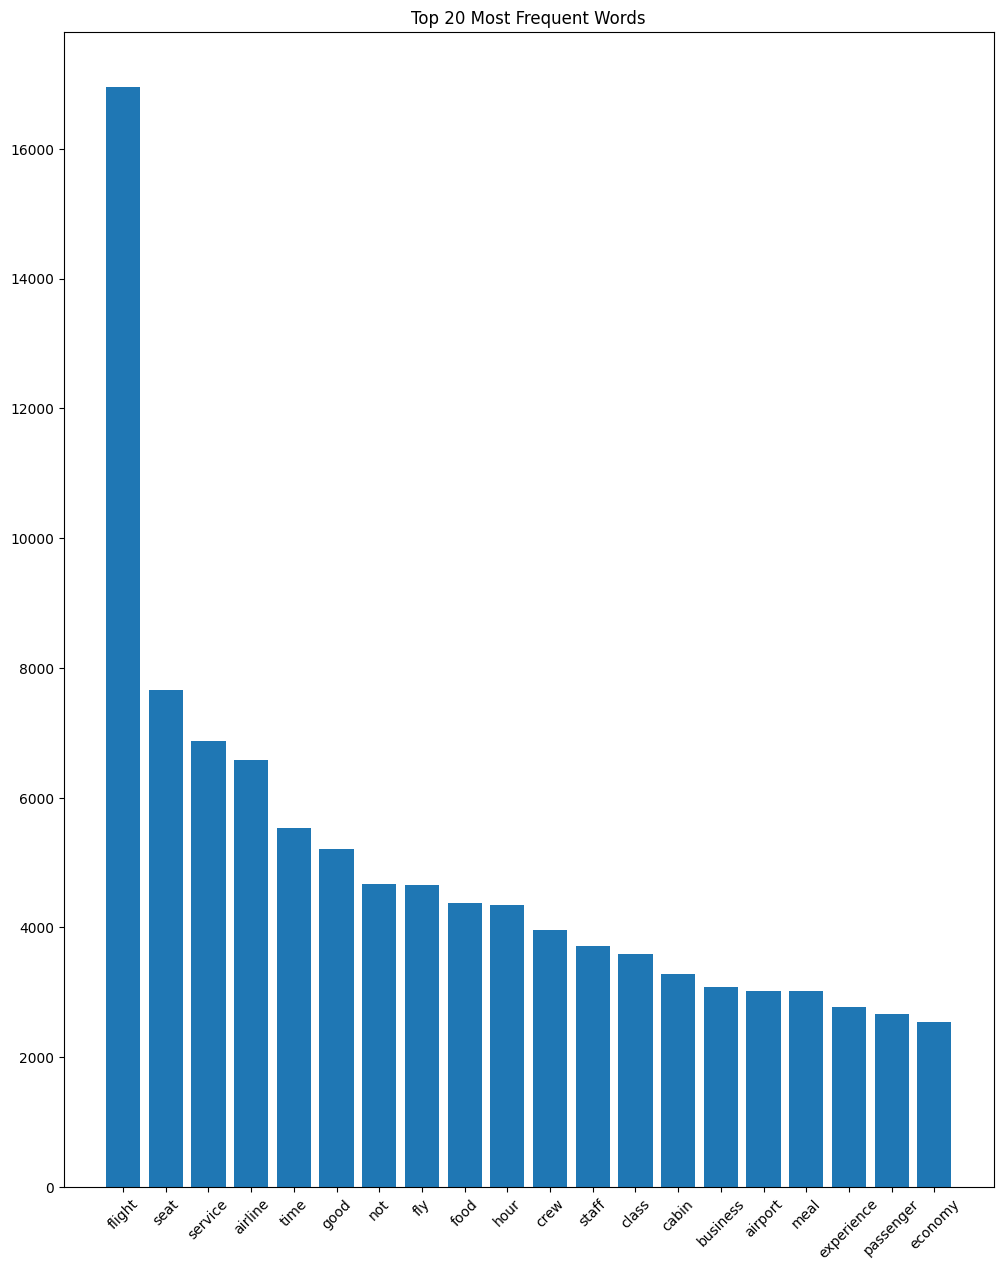

In [ ]:
from collections import Counter

all_text = " ".join(df['Cleaned Reviews'].dropna())

words = all_text.split()

word_freq = Counter(words)

common_words = word_freq.most_common(20)

freq_df = pd.DataFrame(common_words, columns=['word', 'count'])


plt.figure(figsize=(12,15))
plt.bar(freq_df['word'], freq_df['count'])
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.show()

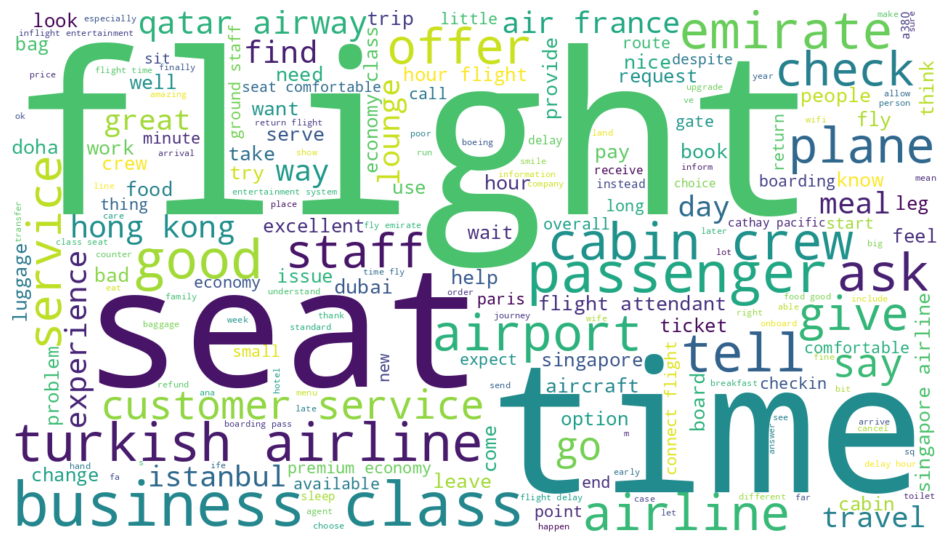

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1280, height=720, background_color='white').generate(all_text)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Document Length

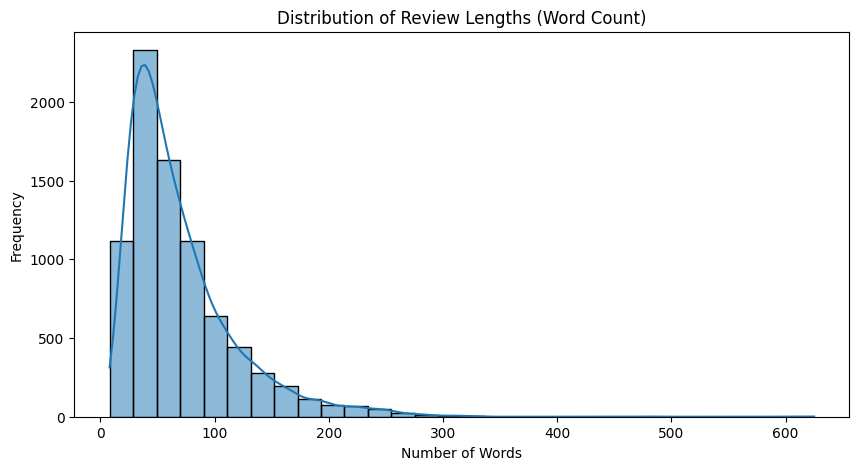

In [14]:
df['Review Length'] = df['Cleaned Reviews'].apply(lambda x: len(x.split()))

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Review Length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()